In [13]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import tucker
from tensorly.decomposition import parafac
import matplotlib.pyplot as plt

In [14]:
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                    [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                    [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

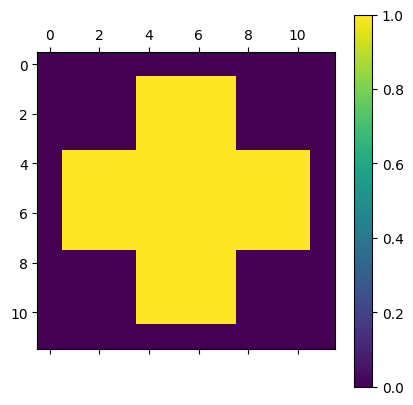

In [15]:
plt.matshow(tensor)
plt.colorbar()
plt.show()

In [22]:
factors = parafac(tensor, rank=2)

In [23]:
tensor_rec = tl.cp_to_tensor(factors)

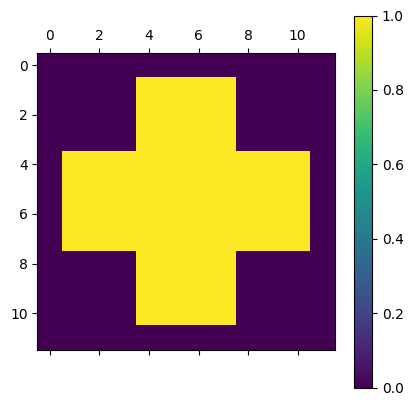

In [24]:
plt.matshow(tensor_rec)
plt.colorbar()
plt.show()

In [25]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import io
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
def read_url(url):
    s=requests.get(url).content
    c=pd.read_csv(io.StringIO(s.decode('utf-8')))
    return c

In [34]:
file_path = '../../raw_data/'
list_files = pd.read_csv(file_path+'tripcsvbame_1month.csv')
list_files['usage-stats/'] = list_files['usage-stats/'].apply(lambda x : x.strip())

In [38]:
frames=[]
link="https://cycling.data.tfl.gov.uk/usage-stats/"

for file in list_files['usage-stats/']:
   url = link+file
   frames.append(read_url(url))

result = pd.concat(frames)
result

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,127804092,2023-01-08 23:59,200252,"Bow Church Station, Bow",2023-01-09 00:05,200249,"Queen Mary's, Mile End",30139,CLASSIC,6m 46s,406323
1,127804093,2023-01-08 23:59,960,"Hop Exchange, The Borough",2023-01-09 00:06,22180,"Cheapside, Bank",52971,CLASSIC,7m 15s,435048
2,127804087,2023-01-08 23:58,1152,"Marylebone Lane, Marylebone",2023-01-09 00:03,1164,"Portland Place, Marylebone",30873,CLASSIC,5m 9s,309267
3,127804088,2023-01-08 23:58,300051,"Hibbert Street, Battersea",2023-01-09 00:03,200187,"Morie Street, Wandsworth",55190,CLASSIC,5m 9s,309019
4,127804089,2023-01-08 23:58,1201,"Bank of England Museum, Bank",2023-01-09 00:13,22166,"Albert Gardens, Stepney",53576,CLASSIC,15m 1s,901787
...,...,...,...,...,...,...,...,...,...,...,...
155441,128230322,2023-01-30 00:03,1113,"Trebovir Road, Earl's Court",2023-01-30 00:10,200181,"Richmond Way, Shepherd's Bush",52852,CLASSIC,7m 9s,429495
155442,128230320,2023-01-30 00:01,2666,"Howick Place, Westminster",2023-01-30 00:23,200256,"Sutton Street, Shadwell",51794,CLASSIC,21m 49s,1309664
155443,128230321,2023-01-30 00:01,1090,"Warren Street Station, Euston",2023-01-30 00:08,1225,"George Street, Marylebone",56197,CLASSIC,6m 55s,415212
155444,128230318,2023-01-30 00:00,300242,"Allington Street, Victoria",2023-01-30 00:13,300075,"Upcerne Road, West Chelsea",57886,CLASSIC,13m 6s,786492


In [39]:
result.columns

Index(['Number', 'Start date', 'Start station number', 'Start station',
       'End date', 'End station number', 'End station', 'Bike number',
       'Bike model', 'Total duration', 'Total duration (ms)'],
      dtype='object')

In [40]:
result['Total duration (ms)'] = result['Total duration (ms)']/1000

In [41]:
dict_columns = {
    "Number": "rentalid",
    "Total duration (ms)": "duration",
    "Start station" : 'startstationname',
    'End station': 'endstationname',
    'Start date': 'startdate',
    'Start station number':'so_id',
    'End station number':'sd_id'
}
result_general = result.rename(columns=dict_columns)
result_general.columns

Index(['rentalid', 'startdate', 'so_id', 'startstationname', 'End date',
       'sd_id', 'endstationname', 'Bike number', 'Bike model',
       'Total duration', 'duration'],
      dtype='object')

In [42]:
result_final = result_general[['startdate','endstationname','startstationname','duration']]
result_final['startdate'] = result_final['startdate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

/tmp/ipykernel_9246/1801855731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_final['startdate'] = result_final['startdate'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))


In [43]:
results_f = result_final[result_final['duration']<3600]

In [44]:
results_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 656993 entries, 0 to 155445
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   startdate         656993 non-null  datetime64[ns]
 1   endstationname    656993 non-null  object        
 2   startstationname  656993 non-null  object        
 3   duration          656993 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 25.1+ MB


In [45]:
new_result = results_f.set_index('startdate').groupby([pd.Grouper(freq='h'), 'startstationname', 'endstationname']).count()
new_result = new_result.rename(columns={'duration':'Nooftrips'})
df = new_result.reset_index()
df = df.sort_values(by=['startdate'])
df = new_result.reset_index()
df

,startdate,startstationname,endstationname,Nooftrips
0,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Alpha Grove, Millwall",1
1,2023-01-02 00:00:00,"Ackroyd Drive, Bow","Devons Road, Bow",1
2,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Park Street, Bankside",2
3,2023-01-02 00:00:00,"Albert Embankment, Vauxhall","Thorndike Close, West Chelsea",1
4,2023-01-02 00:00:00,"Bancroft Road, Bethnal Green","Bancroft Road, Bethnal Green",2
...,...,...,...,...
611524,2023-02-05 23:00:00,"Westbourne Park Road, Portobello","Hereford Road, Bayswater",2
611525,2023-02-05 23:00:00,"Westferry DLR, Limehouse","Tanner Street, Bermondsey",1
611526,2023-02-05 23:00:00,"Westminster Pier, Westminster","Kennington Road , Vauxhall",1
611527,2023-02-05 23:00:00,"World's End Place, West Chelsea","Queen's Gate (South), South Kensington",1


In [50]:
df.groupby('startstationname').sum()

TypeError: datetime64 type does not support sum operations